In [20]:
import pandas as pd
import numpy as np
from datetime import datetime

# Load both datasets
train_df = pd.read_csv("../datasets/Airbnb_train.csv")
test_df = pd.read_csv("../datasets/Airbnb_test.csv")

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

Train shape: (54110, 29)
Test shape: (20000, 28)


In [21]:
def clean_airbnb_data(df):
    """
    Clean Airbnb dataset by handling missing values, converting dates, and removing duplicates
    """
    # Make a copy to avoid modifying the original dataframe
    df = df.copy()
    
    # Remove duplicates
    df.drop_duplicates(inplace=True)
    
    # Convert dates
    date_cols = ['first_review', 'host_since', 'last_review']
    for col in date_cols:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors='coerce')
    
    # Handle missing values
    df.dropna(subset=['latitude', 'longitude'], inplace=True)
    if 'price' in df.columns:  # price might not be in test set
        df.dropna(subset=['price'], inplace=True)
    df['review_scores_rating'] = df['review_scores_rating'].fillna(df['review_scores_rating'].mean())
    df['number_of_reviews'] = df['number_of_reviews'].fillna(0)
    df['beds'] = df['beds'].fillna(1)
    df['bedrooms'] = df['bedrooms'].fillna(1)
    
    # Feature engineering
    if 'price' in df.columns:
        df['log_price'] = np.log1p(df['price'])
    
    if 'last_review' in df.columns:
        df['month'] = df['last_review'].dt.month.fillna(0).astype(int)
    
    if 'amenities' in df.columns:
        df['has_wifi'] = df['amenities'].str.contains('Wifi', case=False, na=False).astype(int)
    
    # Host features
    df['host_verified'] = df['host_identity_verified'].map({'t': 1, 'f': 0})
    df['host_has_pic'] = df['host_has_profile_pic'].map({'t': 1, 'f': 0})
    
    # Instant bookable
    df['instant_bookable'] = df['instant_bookable'].map({'t': 1, 'f': 0})
    
    # City encoding
    df['city'] = df['city'].fillna('Unknown')
    
    return df

# Apply cleaning to both datasets
print("Cleaning train dataset...")
train_df_cleaned = clean_airbnb_data(train_df)
print("Train shape after cleaning:", train_df_cleaned.shape)

print("\nCleaning test dataset...")
test_df_cleaned = clean_airbnb_data(test_df)
print("Test shape after cleaning:", test_df_cleaned.shape)

Cleaning train dataset...
Train shape after cleaning: (54110, 34)

Cleaning test dataset...
Train shape after cleaning: (54110, 34)

Cleaning test dataset...
Test shape after cleaning: (20000, 32)
Test shape after cleaning: (20000, 32)


Basic information about cleaned train dataset:

First few rows:
      id property_type        room_type  \
0  49225         House  Entire home/apt   
1  59982     Apartment  Entire home/apt   
2  10617     Apartment  Entire home/apt   
3  11041     Apartment     Private room   
4   8852         House  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {Internet,"Wireless Internet","Air conditionin...            10        3.5   
1  {TV,"Cable TV",Internet,"Wireless Internet","A...             3        1.0   
2  {Internet,"Wireless Internet","Air conditionin...             2        1.0   
3  {Internet,"Wireless Internet","Air conditionin...             1        1.0   
4  {TV,Internet,"Wireless Internet",Kitchen,"Free...             6        2.0   

   bed_type cancellation_policy  cleaning_fee city  ...  \
0  Real Bed              strict          True  NYC  ...   
1  Real Bed            flexible          True   LA  ...   
2  Real Bed  

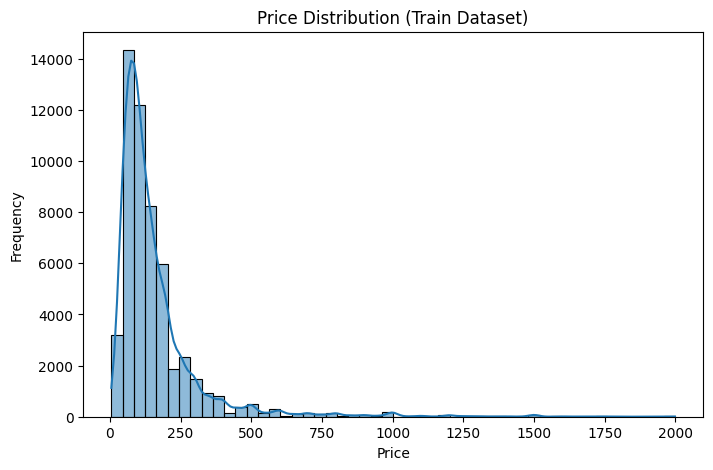

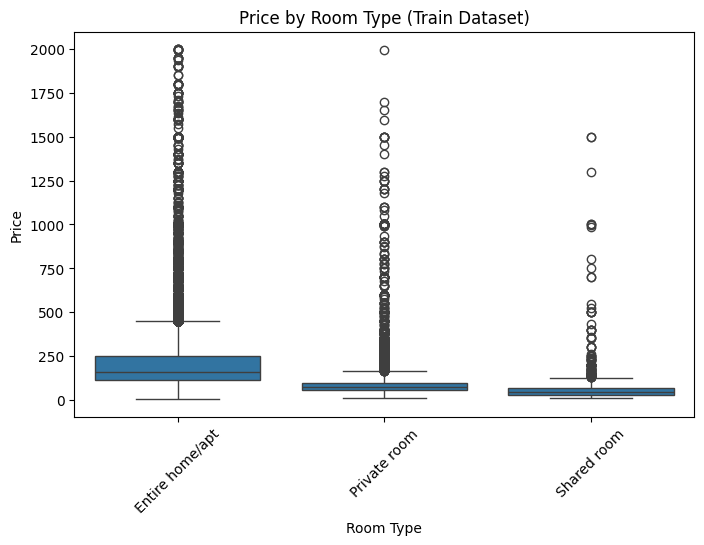

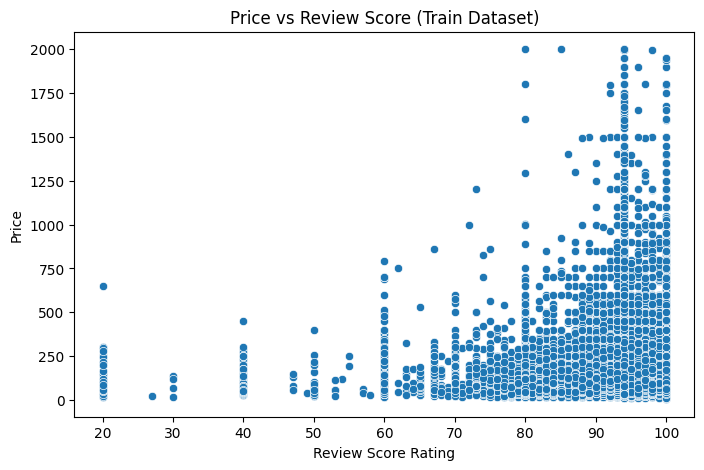

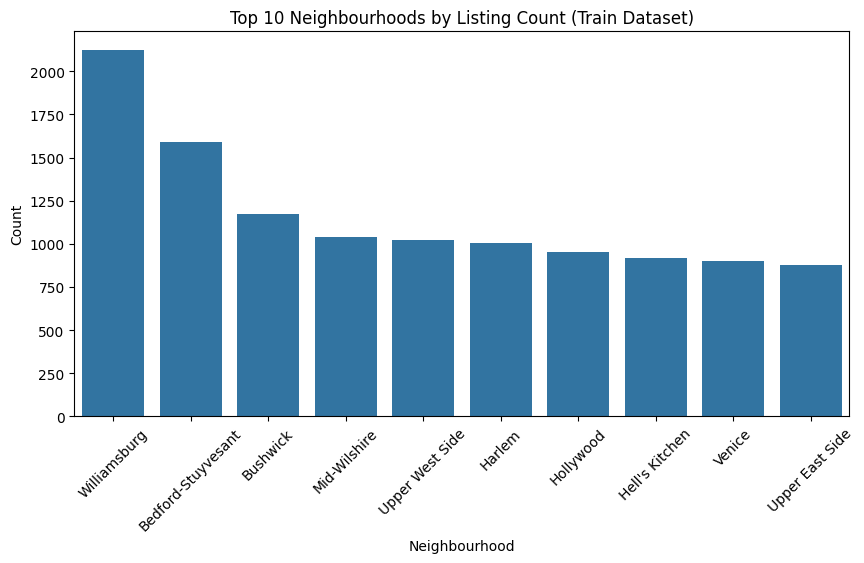

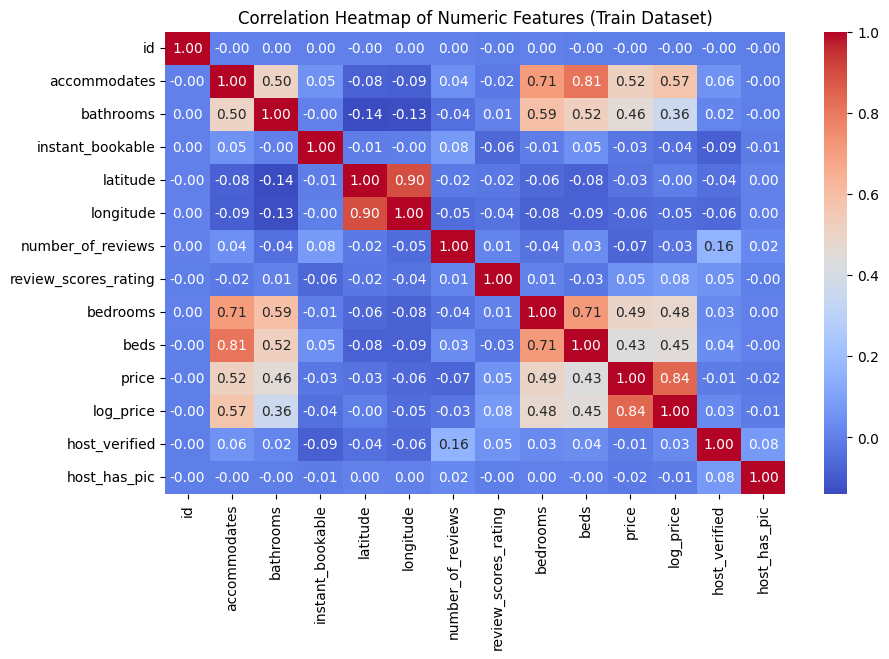

In [22]:
#eda for cleaned train dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Basic info
print("Basic information about cleaned train dataset:")
print("\nFirst few rows:")
print(train_df_cleaned.head())
print("\nDescriptive statistics:")
print(train_df_cleaned.describe())
print("\nMissing values:")
print(train_df_cleaned.isnull().sum())

# 1️⃣ Price distribution
if 'price' in train_df_cleaned.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(train_df_cleaned['price'], bins=50, kde=True)
    plt.title("Price Distribution (Train Dataset)")
    plt.xlabel("Price")
    plt.ylabel("Frequency")
    plt.show()

# 3️⃣ Price by room_type
if 'room_type' in train_df_cleaned.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='room_type', y='price', data=train_df_cleaned)
    plt.title("Price by Room Type (Train Dataset)")
    plt.xlabel("Room Type")
    plt.ylabel("Price")
    plt.xticks(rotation=45)
    plt.show()

# 4️⃣ Price vs Rating
if 'review_scores_rating' in train_df_cleaned.columns:
    plt.figure(figsize=(8,5))
    sns.scatterplot(x='review_scores_rating', y='price', data=train_df_cleaned)
    plt.title("Price vs Review Score (Train Dataset)")
    plt.xlabel("Review Score Rating")
    plt.ylabel("Price")
    plt.show()

# 5️⃣ Listings by Neighbourhood (Top 10)
if 'neighbourhood' in train_df_cleaned.columns:
    plt.figure(figsize=(10,5))
    top10 = train_df_cleaned['neighbourhood'].value_counts().head(10)
    sns.barplot(x=top10.index, y=top10.values)
    plt.xticks(rotation=45)
    plt.title("Top 10 Neighbourhoods by Listing Count (Train Dataset)")
    plt.xlabel("Neighbourhood")
    plt.ylabel("Count")
    plt.show()

# 6️⃣ Correlation heatmap
plt.figure(figsize=(10,6))
numeric_cols = train_df_cleaned.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = train_df_cleaned[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features (Train Dataset)")
plt.show()

In [23]:
# Store the cleaned datasets for use in other notebooks
%store train_df_cleaned
%store test_df_cleaned

print("Datasets cleaned and stored successfully!")

Stored 'train_df_cleaned' (DataFrame)
Stored 'test_df_cleaned' (DataFrame)
Datasets cleaned and stored successfully!
